# 1. Mengeksplor Data

In [1]:
import pandas as pd
df = pd.read_csv("/kaggle/input/nlp-tweet-tayangan-tv/dataset_tweet_sentimen_tayangan_tv.csv")
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S..."
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar..."
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              400 non-null    int64 
 1   Sentiment       400 non-null    object
 2   Acara TV        400 non-null    object
 3   Jumlah Retweet  400 non-null    int64 
 4   Text Tweet      400 non-null    object
dtypes: int64(2), object(3)
memory usage: 15.8+ KB


In [3]:
df.isnull().sum()

Id                0
Sentiment         0
Acara TV          0
Jumlah Retweet    0
Text Tweet        0
dtype: int64

In [4]:
df.value_counts('Sentiment')

Sentiment
negative    200
positive    200
Name: count, dtype: int64

In [5]:
df.groupby('Sentiment').describe()

Id                                                         \
           count   mean         std   min     25%    50%     75%    max   
Sentiment                                                                 
negative   200.0  225.5  113.013763  51.0  138.25  225.5  312.75  400.0   
positive   200.0  175.5  113.013763   1.0   88.25  175.5  262.75  350.0   

          Jumlah Retweet                                              
                   count   mean       std  min  25%  50%   75%   max  
Sentiment                                                             
negative           200.0  0.595  1.553396  0.0  0.0  0.0   0.0  10.0  
positive           200.0  6.570  5.225094  0.0  2.0  5.0  10.0  19.0

# 2. Pre-Process Data

**2.1 Menghilangkan Simbol Khusus**

In [6]:
import re

def remove_symbols(text):
    symbols_to_remove = r'[@_#.\':\/!,&"?\-]'
    cleaned_text = re.sub(symbols_to_remove, '', text)
    return cleaned_text

df['Clean'] = df['Text Tweet'].apply(remove_symbols)

In [7]:
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,Clean
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",Undang NShaniJKT48 ke hitamputih pemenang SSK ...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,Selamat berbuka puasa Semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",Ada nih di trans7 hitam putih dia dpt pengharg...
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,Asiknya nonton Hitam Putih Trans7


**2.2 Lowercasing**

In [8]:
df['Clean'] = df['Clean'].str.lower()

In [9]:
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,Clean
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang nshanijkt48 ke hitamputih pemenang ssk ...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat berbuka puasa semoga amal ibadah hari ...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans7 hitam putih dia dpt pengharg...
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans7


**2.3 Stemming**

In [10]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.8 MB/s eta 0:00:0000:010:010m


In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
def stem_sentence(sentence):
    stemmed_sentence = stemmer.stem(sentence)
    return stemmed_sentence

In [13]:
df['Clean'] = df['Clean'].apply(stem_sentence)
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,Clean
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang nshanijkt48 ke hitamputih menang ssk jk...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah hari ni te...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans7 hitam putih dia dpt harga ju...
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans7


**2.4 Tokenization**

In [14]:
import nltk

def tokenize_sentence(sentence):
    # Tokenize the sentence into words
    tokens = nltk.word_tokenize(sentence)
    return tokens

In [15]:
df.head()

,Id,Sentiment,Acara TV,Jumlah Retweet,Text Tweet,Clean
0,1,positive,HitamPutihTransTV,12,"Undang @N_ShaniJKT48 ke hitamputih, pemenang S...",undang nshanijkt48 ke hitamputih menang ssk jk...
1,2,positive,HitamPutihTransTV,6,Selamat berbuka puasa Semoga amal ibadah hari ...,selamat buka puasa moga amal ibadah hari ni te...
2,3,positive,HitamPutihTransTV,9,"Ada nih di trans7 hitam putih, dia dpt penghar...",ada nih di trans7 hitam putih dia dpt harga ju...
3,4,positive,HitamPutihTransTV,2,selamat ya mas @adietaufan masuk hitamputih,selamat ya mas adietaufan masuk hitamputih
4,5,positive,HitamPutihTransTV,1,Asiknya nonton Hitam Putih Trans7,asiknya nonton hitam putih trans7


**2.5 CountVectorizer**

In [16]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

stop_words_indonesian = list(set(nltk.corpus.stopwords.words('indonesian')))
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words_indonesian, min_df=22)

In [17]:
X = vectorizer.fit_transform(df['Clean'])
y = df['Sentiment']

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


# 3. KNN

**3.1 Modelling**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=56)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**3.2 Evaluasi**

In [19]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred  = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nclassification report is :\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n",conf_matrix)

Accuracy: 0.7375
Precision: 0.7423295454545454
Recall: 0.7375
F1 Score: 0.7388795986622073

classification report is :
               precision    recall  f1-score   support

    negative       0.80      0.74      0.77        47
    positive       0.67      0.73      0.70        33

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.73        80
weighted avg       0.74      0.74      0.74        80

Confusion Matrix:
 [[35 12]
 [ 9 24]]


# 4. Bi-LSTM

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import to_categorical

2024-06-04 08:06:35.698375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-04 08:06:35.698486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-04 08:06:35.864147: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**4.1 Pre-Processing**

In [32]:
X = vectorizer.fit_transform(df['Clean'])
y = df['Sentiment']

# Pad the sequences
max_len = 100 
X_padded = pad_sequences(X.toarray(), maxlen=max_len, padding='post')

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Get the number of unique classes
num_classes = len(np.unique(y_encoded))
y_categorical = to_categorical(y_encoded, num_classes=num_classes)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.5, random_state=5)

**4.2 Modelling**

In [33]:
vocab_size = len(vectorizer.vocabulary_) + 1  # Plus 1 for padding token

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


**4.3 Training**

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

**4.4 Evaluasi**

In [35]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_test = y_test.flatten()
y_pred = y_pred.flatten()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print('Confusion Matrix:')
print(conf_matrix)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Accuracy: 0.6000
Precision: 0.6000
Recall: 0.6000
F1 Score: 0.6000
Confusion Matrix:
[[120  80]
 [ 80 120]]


# 5. Comparing Accuracy

**5.1 kNN**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming X and y are predefined datasets
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []

for test_size in test_size:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=9)
    
    # Initialize and train the KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    print(f"Test Size: {test_size*100}% - Accuracy: {accuracy:.4f}")

# Print a summary
for size, acc in zip(test_size, accuracies):
    print(f"Test Size: {size*100:.0f}% - Accuracy: {acc:.4f}")

Test Size: 10.0% - Accuracy: 0.6000
Test Size: 20.0% - Accuracy: 0.7000
Test Size: 30.0% - Accuracy: 0.6750
Test Size: 40.0% - Accuracy: 0.6625
Test Size: 50.0% - Accuracy: 0.6300
Test Size: 60.0% - Accuracy: 0.6375
Test Size: 70.0% - Accuracy: 0.5893
Test Size: 80.0% - Accuracy: 0.6188
Test Size: 90.0% - Accuracy: 0.5083


TypeError: 'float' object is not iterable

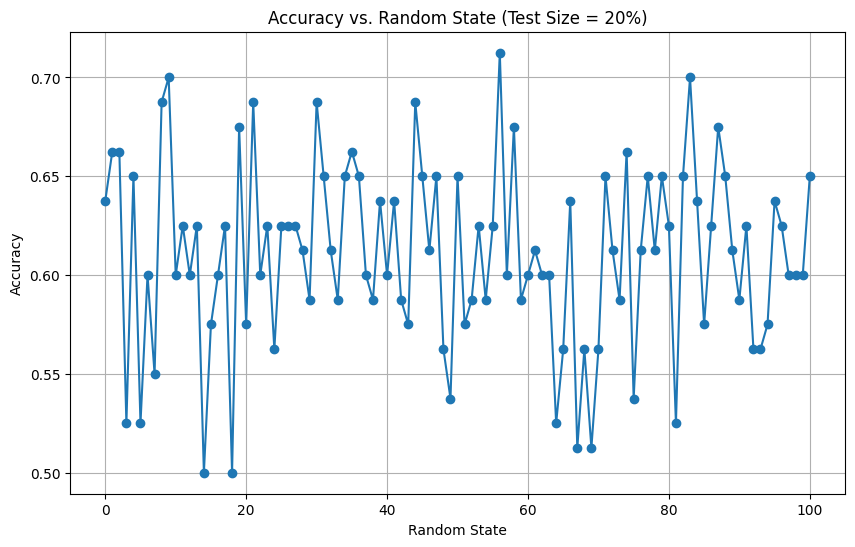

Highest Accuracy: 0.7125 - Random State: 56


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X and y are predefined datasets
random_states = list(range(101))
accuracies = []

for random_state in random_states:
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    # Initialize and train the KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(random_states, accuracies, marker='o')
plt.title('Accuracy vs. Random State (Test Size = 20%)')
plt.xlabel('Random State')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the highest accuracy and corresponding random state
max_accuracy = max(accuracies)
best_random_state = random_states[accuracies.index(max_accuracy)]

print(f"Highest Accuracy: {max_accuracy:.4f} - Random State: {best_random_state}")


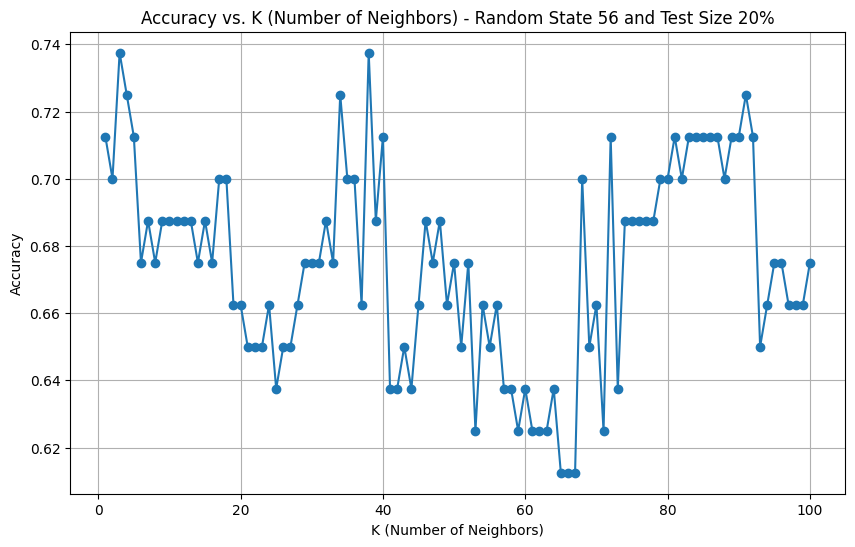

Highest Accuracy: 0.7375 - K: 3


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming X and y are predefined datasets
k_values = list(range(1, 101))
accuracies = []

# Split the dataset with the specified test size and random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

for k in k_values:
    # Initialize and train the KNN classifier with the current k value
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. K (Number of Neighbors) - Random State 56 and Test Size 20%')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Find the highest accuracy and corresponding k value
max_accuracy = max(accuracies)
best_k = k_values[accuracies.index(max_accuracy)]

print(f"Highest Accuracy: {max_accuracy:.4f} - K: {best_k}")


**5.2 Bi-LSTM**

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


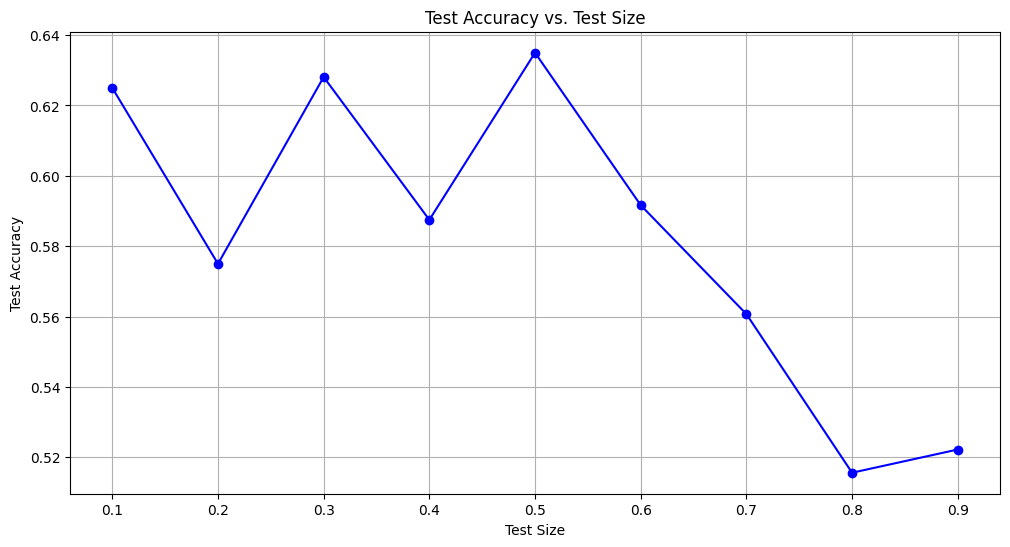

Highest Test Accuracy: 0.6350 at Test Size: 0.5


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model creation function
def create_model(vocab_size, max_len, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# List of test sizes to evaluate
test_sizes = np.arange(0.1, 1.0, 0.1)
history_dict = {}

highest_accuracy = 0
best_test_size = None

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=test_size, random_state=42)
    
    model = create_model(vocab_size=len(vectorizer.vocabulary_) + 1, max_len=max_len, num_classes=num_classes)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    history_dict[test_size] = {
        'train_loss': history.history['loss'],
        'train_accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy'],
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }

    if test_accuracy > highest_accuracy:
        highest_accuracy = test_accuracy
        best_test_size = test_size

# Plotting the results
test_sizes = list(history_dict.keys())
test_accuracies = [history_dict[ts]['test_accuracy'] for ts in test_sizes]

plt.figure(figsize=(12, 6))
plt.plot(test_sizes, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Test Size')
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Print out the highest accuracy and the corresponding test size
print(f"Highest Test Accuracy: {highest_accuracy:.4f} at Test Size: {best_test_size:.1f}")


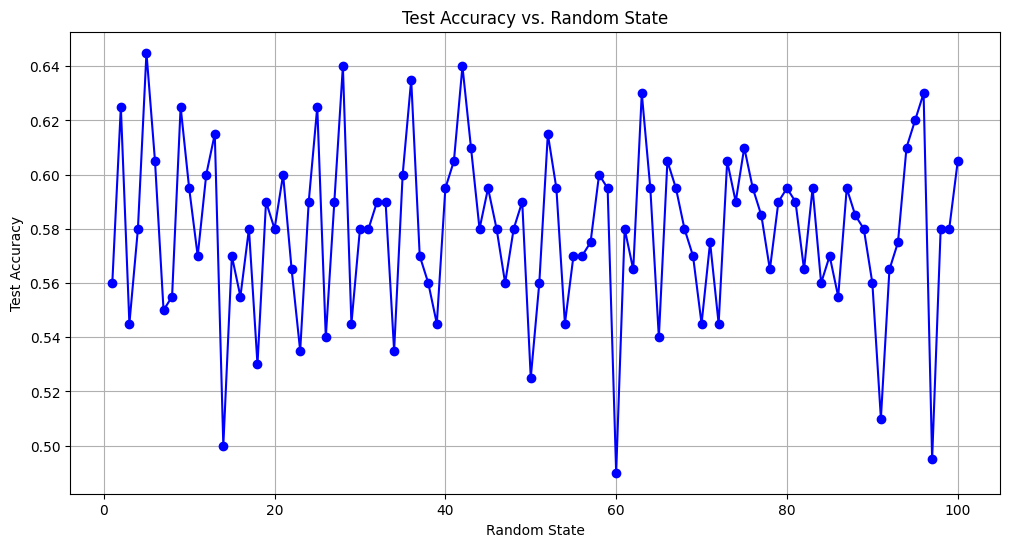

Highest Test Accuracy: 0.6450 at Random State: 5


In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

# Define the model creation function
def create_model(vocab_size, max_len, num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Test size
test_size = 0.5
history_dict = {}

highest_accuracy = 0
best_random_state = None

for random_state in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=test_size, random_state=random_state)
    
    model = create_model(vocab_size=len(vectorizer.vocabulary_) + 1, max_len=max_len, num_classes=num_classes)
    
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    history_dict[random_state] = {
        'train_loss': history.history['loss'],
        'train_accuracy': history.history['accuracy'],
        'val_loss': history.history['val_loss'],
        'val_accuracy': history.history['val_accuracy'],
        'test_loss': test_loss,
        'test_accuracy': test_accuracy
    }

    if test_accuracy > highest_accuracy:
        highest_accuracy = test_accuracy
        best_random_state = random_state

# Plotting the results
random_states = list(history_dict.keys())
test_accuracies = [history_dict[rs]['test_accuracy'] for rs in random_states]

plt.figure(figsize=(12, 6))
plt.plot(random_states, test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy vs. Random State')
plt.xlabel('Random State')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()

# Print out the highest accuracy and the corresponding random state
print(f"Highest Test Accuracy: {highest_accuracy:.4f} at Random State: {best_random_state}")
